In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import copy
import time

from numpy.lib import stride_tricks
%matplotlib inline
import OceanPSC.operations as op
from OceanPSC.utils import load_data
from OceanPSC.Map import Map
import OceanPSC.clustering as clust
import importlib
import random
from skimage.measure import block_reduce
import cv2
import copy
import OceanPSC.DEM as d
import OceanPSC.classification as c
from sklearn.cluster import AgglomerativeClustering
from scipy.spatial.distance import pdist
from scipy.cluster.hierarchy import linkage,fcluster

In [3]:
rr=np.load('data/earth_data.npy')

In [3]:
def reload():
    def run_on(f,tab):
        trslt=[]
        for a in tab:
            rs=[]
            for b in a:
                rs.append(f(b))
            trslt.append(rs)
        return trslt


    def merge(tab):
        ah=np.hstack(tab[0])
        ab=np.hstack(tab[1])
        fin=np.vstack((ah,ab))
        return fin
        
    start=[['data_plus_grande.tif','eurasie.tif','est.tif','far east.tif'],
       ['westdown.tif','eurasie_down.tif','est_down.tif','fareast_down.tif']]
    r=run_on(load_data,start)
    rr=merge(r)
    rr=rr[1000:-1000,:]
    np.save('data/earth_data.npy',rr)

In [6]:
carte=np.int32(block_reduce(rr[100:-100,:],(2,2),np.mean))
dem=d.DEM(carte)

dem.calculate_all_indicators()

dem.elevation=dem.elevation[250:-250,:]
dem.slope=dem.slope[250:-250,:]
dem.roughness=dem.roughness[250:-250,:]
dem.organization=dem.organization[250:-250,:]
dem.curvature=dem.curvature[250:-250,:]

dem.save('data/')

In [8]:
classes=c.get_sea_classification(curvature=dem.curvature,slope=dem.slope,elevation=dem.elevation,
                                 organization=dem.organization,roughness=dem.roughness)
np.save('data/classes.npy',classes)

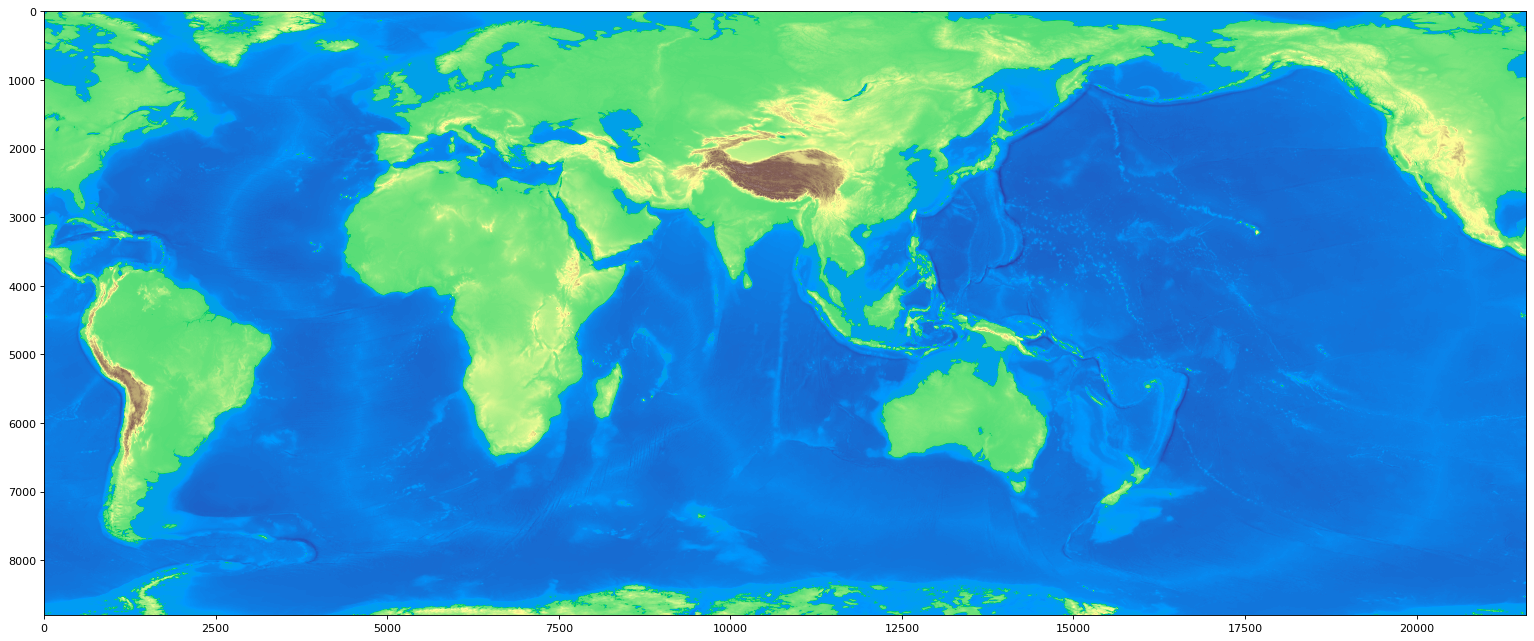

In [48]:
plt.figure(figsize=(27,10),dpi=80)
display=(rr<0)*0.2*(rr)/(-np.min(rr))+(rr>=0)*(0.2+0.8*rr/np.max(rr))
plt.imshow(display,cmap='terrain')

In [84]:
for k in range(nc+1):
    vois_tr=vois[rslt==k]*filt
    vois_tr=vois_tr.reshape(-1)
    for j in range(nc+1):
        mapping_graph[k,j]=np.mean(vois_tr==j)
mapping_graph=mapping_graph/np.sum(mapping_graph,axis=-1)

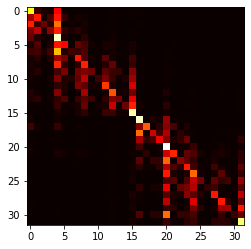

In [85]:
plt.imshow(mapping_graph,cmap='hot')

In [89]:
def neighbours(x,y):
    tab=[(x+1,y),(x-1,y),(x,y+1),(x,y-1),(x+1,y+1),(x-1,y-1),(x+1,y-1),(x-1,y+1)]
    N,M=rslt.shape
    tbr=[]
    for i,j in tab:
        if 0<=i<N and 0<=j<M:
            tbr.append((i,j))
    np.random.shuffle(tbr)
    return tbr

In [333]:
cats=[i for i in range(nc+1)]

In [985]:
creation[vals==vals.max()]=1

In [87]:

rdem=sblock_reduce(dem_map,(15,15),np.mean)

In [101]:
creation=-np.ones(rslt.shape)
creation[rslt>=16]=rslt[rslt>=16]
stack=[(500,200)]
creation[500,200]=rslt[500,200]
while len(stack)!=0:
    topx,topy=stack.pop()
    for cx,cy in neighbours(topx,topy):
        if creation[cx,cy]!=-1:
            continue
        stack.append((cx,cy))
        ps=mapping_graph[int(creation[topx,topy])]
        for i in range(16,32):
            ps[i]=0
        ps=ps/ps.sum()
        categ=np.random.choice([i for i in range(16)],p=ps[:16])
        creation[cx,cy]=categ

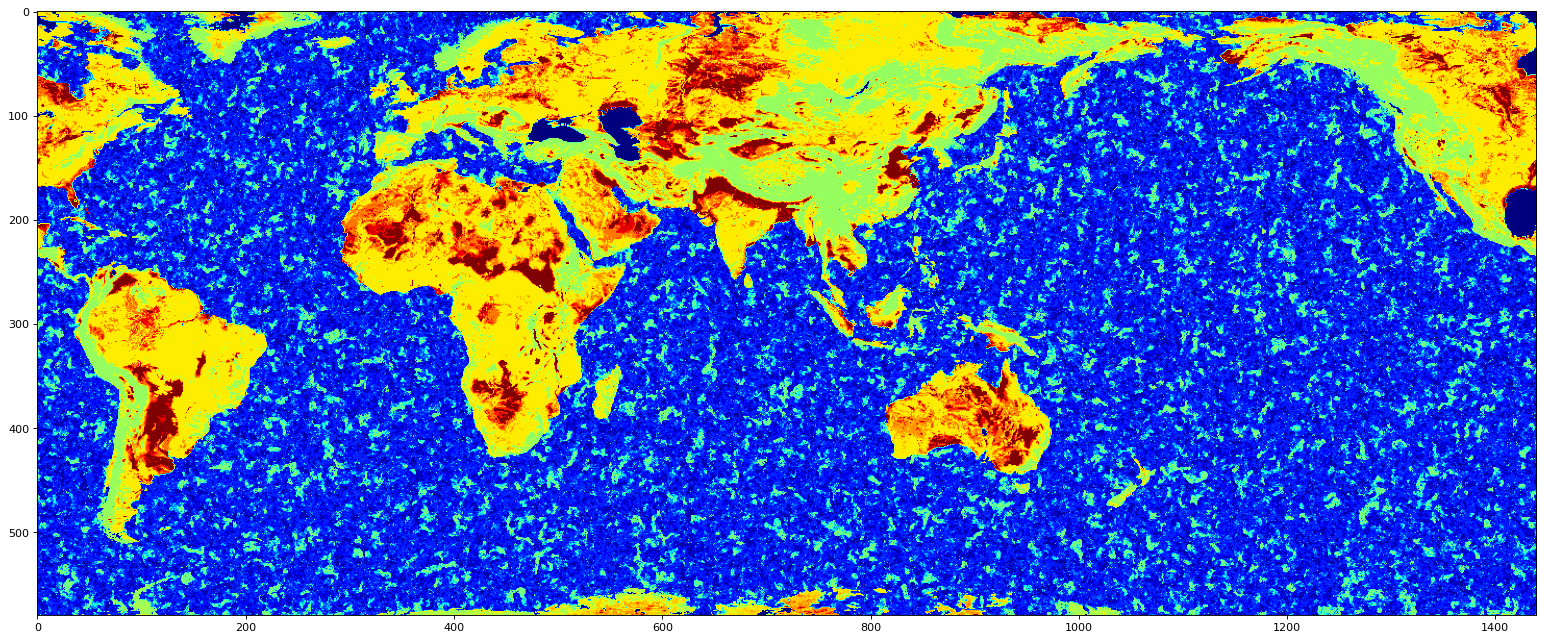

In [103]:
plt.figure(figsize=(27,10),dpi=80)
plt.imshow(creation,cmap="jet")

In [426]:
alt[0,0]=np.min(im_rs)

In [20]:
t=time.time()
roughness,slope,organization,curvature=divide_treatment(w_r,lambda x: all_indicators(x,range(1,16)),r=10,
                                                        result_len=4,vertical_cut=True)
print(time.time()-t)

C:\Users\nicol\Anaconda3\lib\site-packages\ipykernel_launcher.py:118: RuntimeWarning: divide by zero encountered in true_divide
C:\Users\nicol\Anaconda3\lib\site-packages\ipykernel_launcher.py:118: RuntimeWarning: invalid value encountered in true_divide


0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
15791.43127989769


In [74]:

rcl_map=np.load('data/rclasses.npy')

In [89]:
classes2=np.load('data/classes - Copie.npy')

In [23]:
importlib.reload(c)

<module 'OceanPSC.classification' from 'C:\\Users\\nicol\\source\\repos\\OceanPSC\\OceanPSC\\classification.py'>

In [558]:
dem=c.default_dem()

In [68]:
np.save('data/classes.npy',classes)

In [26]:
classes=c.default_classification()

In [49]:
(classes==c.CONTINENTAL_RISE).mean()

0.04441954191033139

In [32]:
(180/np.pi)*np.arctan(1/16)

3.576334374997351

In [24]:
classes=c.get_sea_classification(curvature=dem.curvature,slope=dem.slope,elevation=dem.elevation,
                                 organization=dem.organization,roughness=dem.roughness)
classes=classes[250:-250,:]
#earth_classes=np.load('data/earth_classes.npy')[250:-250,:]
#classes[dem.elevation[250:-250,:]>=0]=16-earth_classes[dem.elevation[250:-250,:]>=0]

In [21]:
above=dem.elevation[250:-250,:]>=0

In [121]:
np.unique(regions_classes[(regions_sizes==1)&(regions_classes<=CONTINENTAL_SHELF)],return_counts=True)

(array([0., 1., 2., 3., 4., 5., 6.]),
 array([ 74, 104, 112, 229, 139, 192, 153], dtype=int64))

In [122]:
((regions_sizes==1)&(regions_classes<=CONTINENTAL_SHELF)).sum()

1003

In [123]:
(regions_sizes!=0).sum()

21650

In [130]:
((adjacencies[regions_classes==LAND]*(regions_classes[None,:]==CONTINENTAL_SHELF)).sum(axis=-1)>0).mean()

0.5525040387722132

In [449]:
df=pd.DataFrame(np.int32(0.5+1000*adjs/adjs.sum(axis=0))/10,columns=cols2,index=cols2)
df

MOR   VRS    RS    AP    CR    CS   CSH  LAND   SCA    SM
MOR    0.0   5.3   5.5   3.9   3.5   4.9   0.3   1.0   6.0  43.7
VRS   22.6   0.0  53.9   4.4   4.3   6.0   0.0   0.0   5.3  11.8
RS    37.3  85.3   0.0  51.9  21.3  22.6   0.0   0.0  17.9  44.0
AP    13.0   3.5  25.5   0.0  58.1  16.8   1.3   0.0   1.0   0.5
CR     5.5   1.6   5.0  27.7   0.0   8.5   0.6   0.0   0.3   0.0
CS    10.9   3.1   7.4  11.2  11.9   0.0  26.7   1.2  54.2   0.0
CSH    0.6   0.0   0.0   0.7   0.7  21.2   0.0  94.7  10.6   0.0
LAND   1.2   0.0   0.0   0.0   0.0   0.7  66.4   0.0   4.8   0.0
SCA    4.7   1.0   2.1   0.2   0.1  19.3   4.7   3.1   0.0   0.0
SM     4.2   0.3   0.6   0.0   0.0   0.0   0.0   0.0   0.0   0.0

In [824]:
import OceanPSC.classification as c

In [525]:

nc=int(np.max(classes))
mapping_graph=np.zeros((nc+1,nc+1))
print(nc)
for j in range(nc+1):
    def do(classes):
        vois=np.int32(op.neighbor_grid(classes,12,bound_method='duplicate'))
        return (vois==j).mean(axis=(-1,-2))
    rs=op.divide_treatment(classes,do,r=10)
    for k in range(nc+1):
        mapping_graph[k,j]=rs[classes==k].mean()
    print(np.sum(mapping_graph,axis=-1))
mapping_graph=mapping_graph/np.sum(mapping_graph,axis=-1)[:,None]


16


In [530]:
mapping_graph.sum(axis=1)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

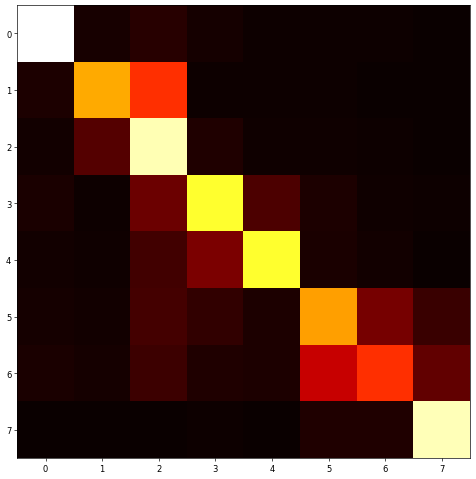

In [533]:
plt.figure(figsize=(20,10),dpi=60)
plt.imshow(mapping_graph[:8,:8],cmap='hot')

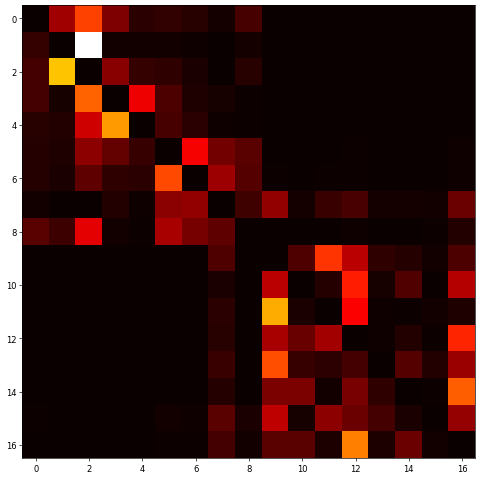

In [655]:
i,j=np.indices(mapping_graph.shape)
plt.figure(figsize=(20,10),dpi=60)
plt.imshow(mapping_graph2,cmap='hot')

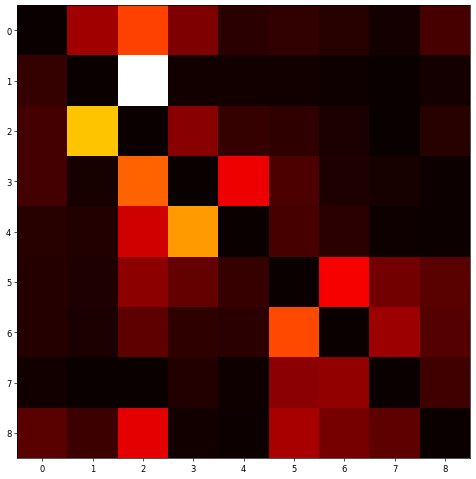

In [683]:
i,j=np.indices(mapping_graph.shape)
plt.figure(figsize=(20,10),dpi=60)
plt.imshow(mapping_graph2[:9,:9],cmap='hot')

In [596]:
np.save('data/map_graph.npy',mapping_graph)

In [618]:
mapping_graph.shape

(17, 17)

In [651]:
mapping_graph2=mapping_graph.copy()
i,j=np.indices(mapping_graph2.shape)
mapping_graph2[i==j]=0
mapping_graph2=mapping_graph2/mapping_graph2.sum(axis=1)[:,None]

In [279]:
cols2=['MOR','VRS','RS','AP','CR','CS1','CS2','CSH','SCA']

In [668]:
s_df=pd.DataFrame(columns=cols2,data=[[int(0.5+(classes==i).mean()*100) for i in range(9)]])
s_df

MOR  VRS  RS  AP  CR  CS1  CS2  CSH  SCA
0   10    8  31   7   4    3    2    7    2

In [664]:
dff=pd.DataFrame(columns=cols2,data=mapping_graph[:9,:9].T*100,
                 index=cols2)
dff

MOR        VRS         RS         AP         CR        CS1  \
MOR  89.856507   2.498861   1.315339   2.242822   1.141962   1.654284   
VRS   2.012346  55.655099  10.010903   0.592410   0.968456   1.371093   
RS    4.157728  39.294435  82.858626  13.272996   7.601439   8.049593   
AP    1.550271   0.508481   2.902441  70.907574  15.372726   5.393658   
CR    0.453549   0.477631   0.955103   8.833054  70.932157   2.798161   
CS1   0.548127   0.564128   0.843775   2.585483   2.334377  54.189995   
CS2   0.399515   0.340622   0.401418   0.837027   1.233776  14.424724   
CSH   0.146417   0.003139   0.003495   0.581265   0.288870   6.360990   
SCA   0.822527   0.657125   0.708144   0.143491   0.125858   4.905522   

           CS2        CSH        SCA  
MOR   2.125973   0.196976   5.001207  
VRS   1.459680   0.003401   3.217604  
RS    6.752113   0.014861  13.610202  
AP    3.078765   0.540514   0.603062  
CR    2.607554   0.154346   0.303933  
CS1  25.433315   2.835408   9.882816  
CS2  39.301617   3.015790   6.722232  
CSH  11.929047  83.516030   5.295255  
SCA   5.883197   1.171608  53.019110

Un graphe comme celui-là, permet de repérer des intrications entre types, alors que le suivant donne des adjacences plutôt utilisées dans l'hypothèse où les types ont des régions à peu près fermées.
Elements à faible diagonales et donc susceptibles d'êtres imbriqué dans un autre élément:
- VRS: très imbriqué dans RS avec une réciprocité correspondant au rapport de taille
- les diagonales intermédiaires d'AP et CR semblent être un cas de semi-imbrication, i.e frontières poreuses et zone de chevauchement. On reviendra dessus dans les adjacences
- CS1 et CS2 sont assez ouverts et débordent l'un sur l'autre. Ils sont tous les deux de petite taille, ils ne sont pas imbriqués l'un dans l'autre, mais plutôt superposé l'un sur l'autre avec une frontière très poreuse. Etant donné leur contexte, on les traitera comme CS, mais en notant que CS2 a, a priori la meilleure adjacence à CSH.<br>

Au final:
- Imbrication complète: VRS dans RS
- Imbrication partielle: CS2 et CS1
- Frontières poreuses: AP et CR

In [678]:
dff.sum(axis=0)

MOR    99.477381
VRS    99.998919
RS     99.995590
AP     99.986674
CR     99.998691
CS1    98.140184
CS2    97.646164
CSH    48.124953
SCA    95.009505
dtype: float64

CSH est le seul à avoir une adjacence importante avec l'extérieur, c'est donc le bord de la structure (comme on s'en doutait)

In [677]:
dff=pd.DataFrame(columns=cols2,data=mapping_graph2[:9,:9].T*100,
                 index=cols2)
dff

MOR        VRS         RS         AP         CR        CS1  \
MOR   0.000000   5.635059   7.673475   7.709300   3.928609   3.611185   
VRS  19.838787   0.000000  58.401986   2.036304   3.331709   2.992999   
RS   40.989114  88.610943   0.000000  45.623544  26.150680  17.571692   
AP   15.283404   1.146651  16.932370   0.000000  52.885678  11.773973   
CR    4.471331   1.077081   5.571916  30.362041   0.000000   6.108187   
CS1   5.403731   1.272137   4.922447   8.887136   8.030788   0.000000   
CS2   3.938636   0.768120   2.341809   2.877130   4.244469  31.488151   
CSH   1.443462   0.007080   0.020387   1.997995   0.993778  13.885590   
SCA   8.108917   1.481849   4.131200   0.493225   0.432980  10.708406   

           CS2        CSH        SCA  
MOR   3.502520   1.194953  10.645194  
VRS   2.404808   0.020634   6.848751  
RS   11.124041   0.090153  28.969656  
AP    5.072235   3.279027   1.283632  
CR    4.295920   0.936339   0.646928  
CS1  41.901140  17.201001  21.035822  
CS2   0.000000  18.295290  14.308439  
CSH  19.652989   0.000000  11.271083  
SCA   9.692511   7.107557   0.000000

Les +/- sont là si on a une valeur très significativement au-dessus, ou plus faible mais quand même assez importante pour la mentionner (++ pour imbrication vue plus haut):
- MOR => RS/VRS (VRS significatif, car disproportionellement au rapport de taille RS/VRS),AP, CS/SCA (-)
- VRS => RS (++),MOR
- RS => VRS (++), AP (+), MOR, CR, CS, SCA
- AP => RS (+), CR (+), CS (surtout CS1), MOR
- CR => AP(+), RS, CS (plus CS1, mais moins que AP)
- CS1 => CS2(++),RS, CSH, AP, SCA
- CS2 => CS1 (++), CSH (+), RS, SCA (on a bien priorité de l'adjacence CS1 avec RS/AP et CS2 avec CSH, la semi-intrication perturbe un peu ces adjacences) (on les prendra fusionné en préliminaire et on étudiera plus en détail dans un second temps)
- CSH => (bord structure (+), voir plus haut), CS1/CS2 (déjà discuté plus haut), SCA (-) 
- SCA: tout sauf AP et CR. RS et CS plus important, surtout CS, étant donné la taille. SCA semble être un peu partout dans la masse de RS/VRS (une adjacence importante avec VRS et MOR, et la réciprocité RS montrent bien que SCA n'est pas qu'à un des bord de RS, il n'est pour autant pas entièrement inclus dans RS). On peut conclure qu'il est dispersé mais positionné principalement sur les pentes et dans RS. Avec sa petite taille, on peut se diriger vers l'hypothèse qu'il caractérise plusieurs phénomènes de reliefs rares, et apparaît donc un peu partout) il est très intéressant de noter sa non-adjacence complète avec AP et CR, alors que, surtout pour CR qui est très adjacent avec CS1 dans lequel il s'imbrique, on pourrait s'y attendre. On observe, d'ailleurs l'adjacence avec l'autre voisin de CS: CSH.

mis à part le cas particulier SCA, sur lequel on doit se pencher, on a déjà une idée des adjacences (les (-) disparaissent si non-réciproques ou expliqués par des imbrication ou semi-imbrications, ces critères sont aussi utilisés pour la distinction voisins principaux/secondaires):
- MOR: taille moyenne+fermé, voisin principal RS/VRS, voisin secondaire: AP
- VRS: taille moyenne + assez fermé, imbriqué dans RS; voisin: MOR
- RS taille grande + semi-ouvert. contient: VRS, voisin principal: AP. voisins secondaires: MOR, CR, CS 
- AP: taille moyenne + semi-ouvert, voisins principaux: RS et CR (frontière poreuse), voisins secondaires: MOR et CS
- CR taille petite + semi-ouvert: voisin principal (et frontière poreuse): AP, voisins secondaires: RS, CS
- CS: petit + semi-ouvert,  voisins: CSH, CR, RS
- CSH: element de bord + taille moyenne + plutôt fermé, voisin: CS
- SCA: très petit + semi-ouvert + dispersé

Quantification des adjacences:  0: adjacence avec frontière poreuse, 1: adjacence principale, 2: adjacence secondaire. +: imbrication. Départ à CSH: element de bord. SCA est ignoré. <br>
- CSH | CS (1)
- CS  | CR (1), RS (1), AP (2)
- CR  | AP (0), RS (1)
- AP  | RS (1), MOR (2)
- RS  |VRS (+), MOR (1)
- VRS | RS (+), MOR (1)
- MOR: élément central

agencement possibles:
- CSH=>CS=>(CR=>AP=>RS|CR=>RS|=>RS|[AP(=>RS|)])/(RS)=>(VRS=>|=>)=>MOR
- la question se reste pour savoir si on a des frontières avec progression, ou des alternances
- clairement RS/VRS est une alternance
- CR est en frontière avec CS, AP et RS, CS forme un bloc avec le bord CSH qui n'a pas d'adjacence à RS. Donc, CR est  principalement dans une progression. Ou pourrait avoir deux sous-types, avec l'un des deux en alternance, ou fusionné dans AP, et l'autre en progression. On le déclarera comme principalement en progression.
- Même chose pour CS, principalement en progression avec le bloc du bord, mais éventuellement en alternance. On se penchera sur son lien avec SCARP pour avoir plus d'informations. L'agencement CS1/CS2 pousse vers cette idée de progression. Mais on pourrait quand même avoir des CS secondaires.
- une progression CSH/CS secondaire serait possible, mais le plus probable est qu'une zone isolée de ce type soit associé à un petit bord et corresponde à une île. Ou, en l'absence de bords, on aurait une île légèrement submergée, soit un bord secondaire. La question des îles sera étudiée plus tard.
- l'adjacence AP/MOR pousse vers l'hypothèse qu'AP est dans un mixte progression/alternance. Avec une alternance sans imbrication AP/RS, mais une position plus importante d'AP dans la progression CR=>RS, ce qui a du sens, étant donné la semi-imbrication AP/RS
- en tant qu'élément central, MOR est en alternance avec RS, mais n'est absolument pas une imbrication. A-t-on toujours une inversion de la progression avec coupure centrale, ou plusieurs MOR séparés par du RS?

In [901]:

for d in range (13,25):
    nc=int(np.max(classes))
    mapping_graph=np.zeros((nc+1,nc+1))
    for j in range(nc+1):
        def do(classes):
            vois=op.neighbor_grid(classes,d,bound_method='duplicate')
            return (vois==j).mean(axis=(-1,-2))
        rs=op.divide_treatment(classes,do,r=10)
        for k in range(nc+1):
            mapping_graph[k,j]=rs[classes==k].mean()
    mapping_graph=mapping_graph/np.sum(mapping_graph,axis=-1)[:,None]
    mapping_graphs.append(mapping_graph)
    print(d)
mapping_graphs=np.array(mapping_graphs)

13
14
15
16
17
18
19
20
21
22
23
24


In [902]:
mapping_graphs=np.array(mapping_graphs)

In [907]:
i,j=np.indices(mg2.shape[1:])
mg2=(mapping_graphs * (i!=j)[None,:])
mg2=mg2/np.sum(mg2,axis=-1)[:,:,None]
smaller_graphs=mg2[:,:9,:9]

In [908]:
smaller_graphs=smaller_graphs.transpose(0,2,1)*100

In [909]:
dff=pd.DataFrame(columns=cols2,data=smaller_graphs[10],
                 index=cols2)
dff

MOR        VRS         RS         AP         CR        CS1  \
MOR   0.000000   5.603882   7.608756   7.756316   3.917452   3.557501   
VRS  19.843037   0.000000  58.635447   1.978426   3.357747   2.963000   
RS   40.758277  88.704007   0.000000  45.545578  25.923103  17.243029   
AP   15.445925   1.112652  16.931774   0.000000  53.179846  11.775255   
CR    4.465207   1.080853   5.515980  30.438730   0.000000   6.017633   
CS1   5.396949   1.269450   4.883314   8.970469   8.009237   0.000000   
CS2   3.962798   0.767401   2.316241   2.853182   4.241788  32.316903   
CSH   1.402781   0.006237   0.017203   1.985222   0.984604  13.656352   
SCA   8.189607   1.454883   4.088029   0.463159   0.385618  10.794156   

           CS2        CSH        SCA  
MOR   3.456174   1.152084  10.700566  
VRS   2.369928   0.018138   6.731175  
RS   10.821305   0.075683  28.612762  
AP    4.955433   3.246847   1.205127  
CR    4.216776   0.921709   0.574300  
CS1  42.758917  17.015015  21.396152  
CS2   0.000000  18.356895  14.616697  
CSH  19.493892   0.000000  11.242214  
SCA   9.756616   7.066470   0.000000

In [910]:
dff.sum(axis=0)

MOR    99.464581
VRS    99.999364
RS     99.996743
AP     99.991083
CR     99.999394
CS1    98.323830
CS2    97.829041
CSH    47.852842
SCA    95.078992
dtype: float64

In [875]:
cols2

['MOR', 'VRS', 'RS', 'AP', 'CR', 'CS1', 'CS2', 'CSH', 'SCA']

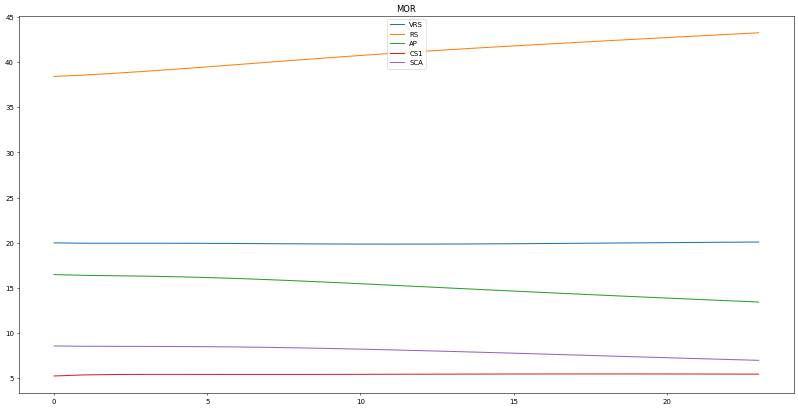

In [912]:

plt.figure(figsize=(20,10),dpi=50)
plt.title(cols2[0])
for i in range(9):
    if smaller_graphs[:,i,0].max()>5:
        plt.plot(smaller_graphs[:,i,0],label=cols2[i])
leg = plt.legend(loc='upper center')
plt.show()

Pour MOR, AP semble être un voisin localisé prôche, contrairement à RS qui l'entoure. VRS est entre les deux, proche, sans entourer

L'adjacence AP/MOR est suspecte. Elle pourrait être entièrement causée par les mini-plateaux locaux dans le mid-oceanic ridge. Pour SCA, la décroissance prend plus de temps, on pourrait supposer que c'est dû à une présence accrue de SCA sur les bordures de MOR

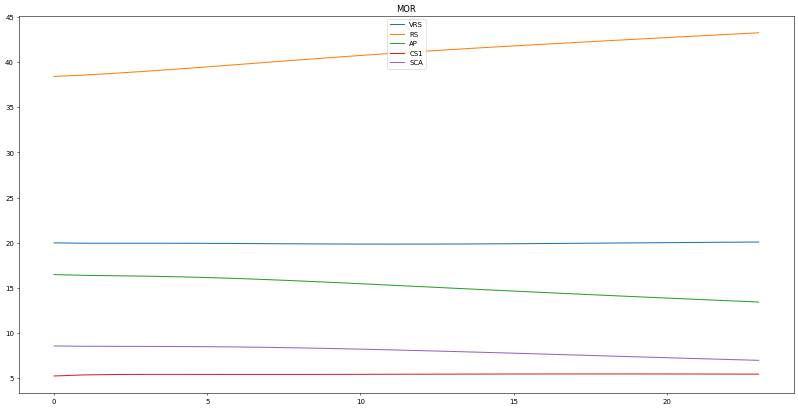

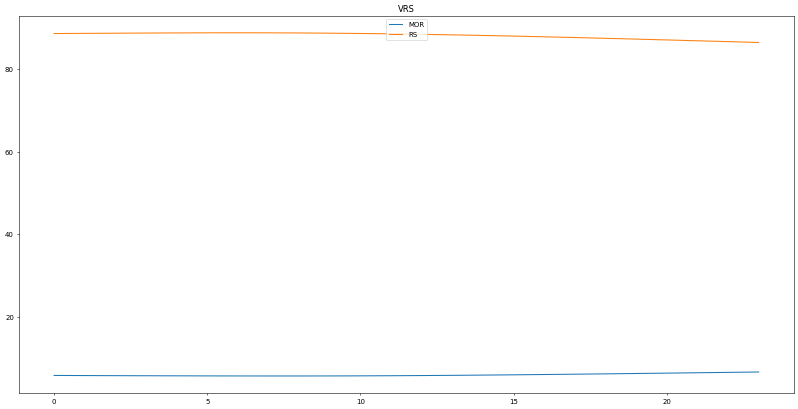

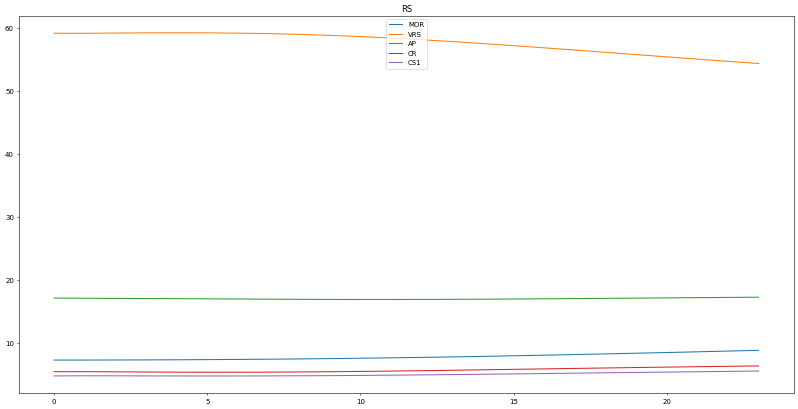

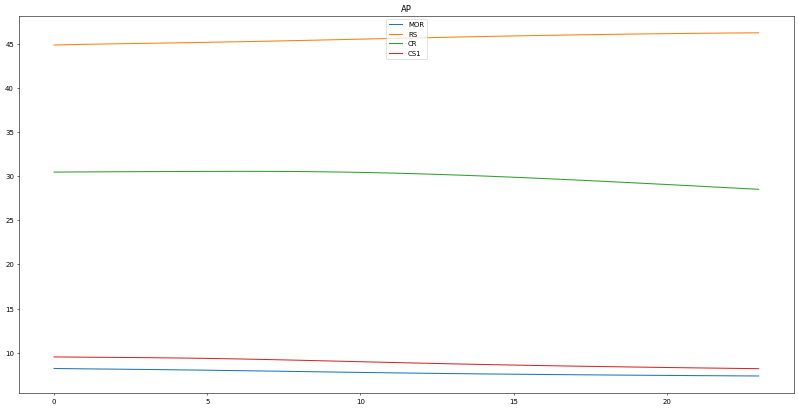

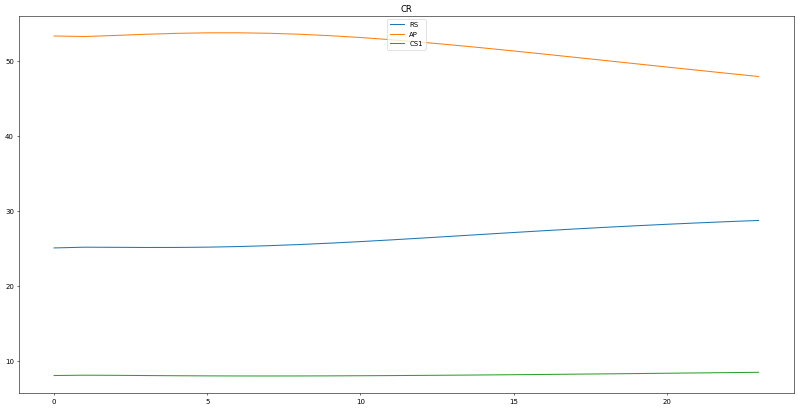

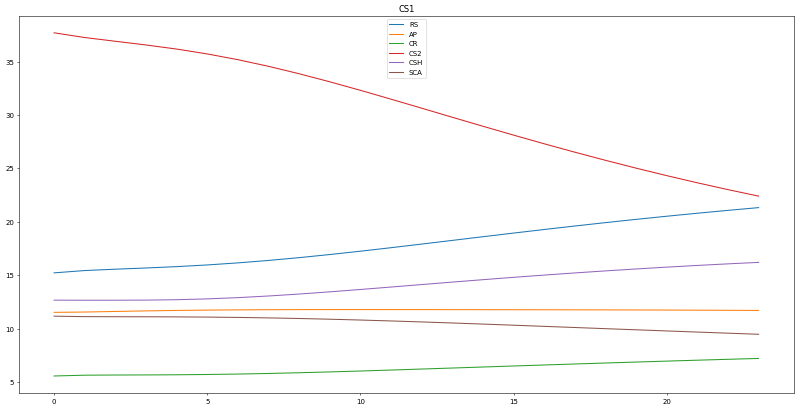

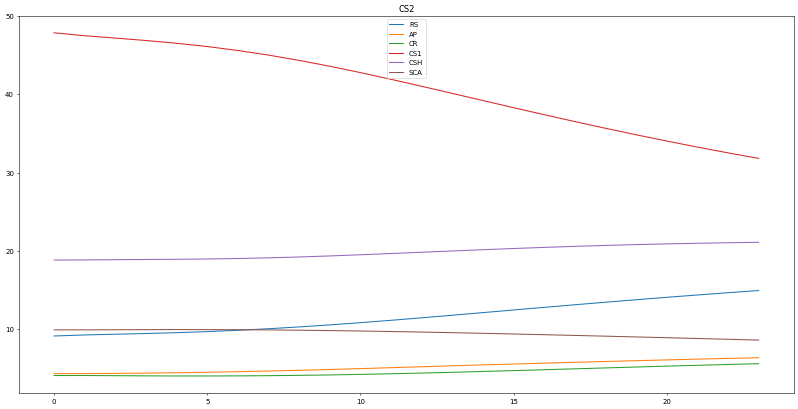

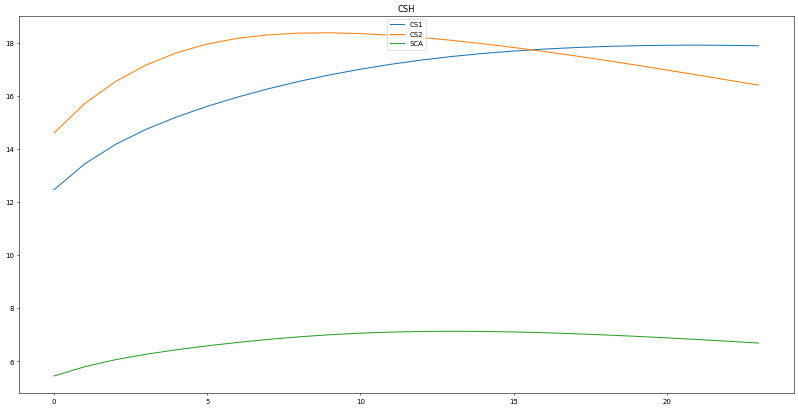

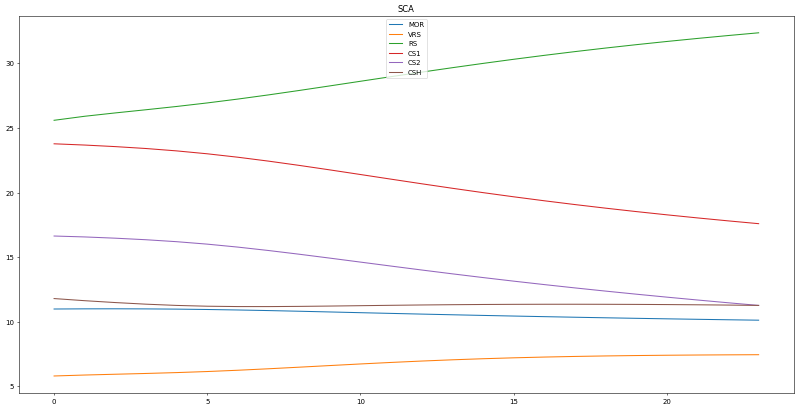

In [913]:
for k in range(9):
    plt.figure(figsize=(20,10),dpi=50)
    plt.title(cols2[k])
    for i in range(9):
        if smaller_graphs[:,i,k].max()>5:
            plt.plot(smaller_graphs[:,i,k],label=cols2[i])
    leg = plt.legend(loc='upper center')
    plt.show()

La théorie d'imbrication VRS/RS est confirmée

La variation très caractéristique CS1/CS2 montre une forte proximité, pas une imbrication, parce qu'ils sont pas assez grands pour s'imbriquer et car les autres adjacences sont diffèrentes, plutôt une superposition de couches, confirme ce qu'on pensait

CSH est clairement adjacente à CS2 puis CS1. CS2 est adjacent à CS1 puis ses voisins. La théorie est confirmée sans l'ombre d'un doute

On a bien: CR=>AP=>RS, mais aussi possibilité de CR=>RS car même à valeurs faibles, on a des adjacences CR=>RS


In [718]:

list(range(1,20))[11:]

[12, 13, 14, 15, 16, 17, 18, 19]

<Figure size 1200x600 with 0 Axes>

0         1         2         3         4         5         6  \
0  0.904907  0.018869  0.038758  0.014688  0.004246  0.005132  0.003768   
1  0.023431  0.581875  0.370893  0.004652  0.004519  0.005308  0.003209   
2  0.012262  0.094491  0.838850  0.027286  0.008889  0.007869  0.003733   
3  0.021249  0.005420  0.124778  0.726036  0.083391  0.024576  0.007817   
4  0.010691  0.009163  0.070746  0.145131  0.727094  0.021858  0.011576   
5  0.015489  0.012901  0.075075  0.051268  0.026200  0.564609  0.140705   
6  0.020053  0.013750  0.062785  0.028751  0.024466  0.248087  0.419800   
7  0.001795  0.000028  0.000118  0.005057  0.001436  0.026504  0.028594   
8  0.047352  0.029786  0.126616  0.005333  0.002541  0.094681  0.064681   

          7         8  
0  0.001334  0.007788  
1  0.000026  0.006083  
2  0.000028  0.006588  
3  0.005439  0.001269  
4  0.002687  0.001052  
5  0.059459  0.046997  
6  0.113104  0.056608  
7  0.844234  0.011007  
8  0.049748  0.557485

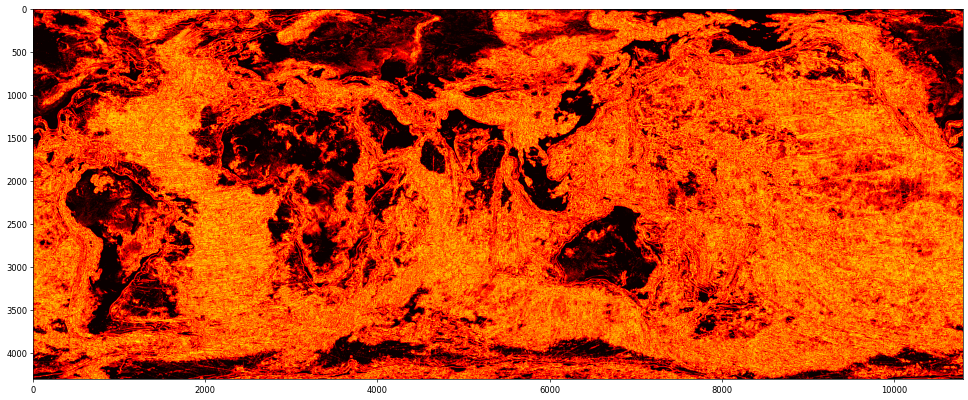

In [483]:
plt.figure(figsize=(20,10),dpi=60)
plt.imshow(dem.roughness,cmap='hot')

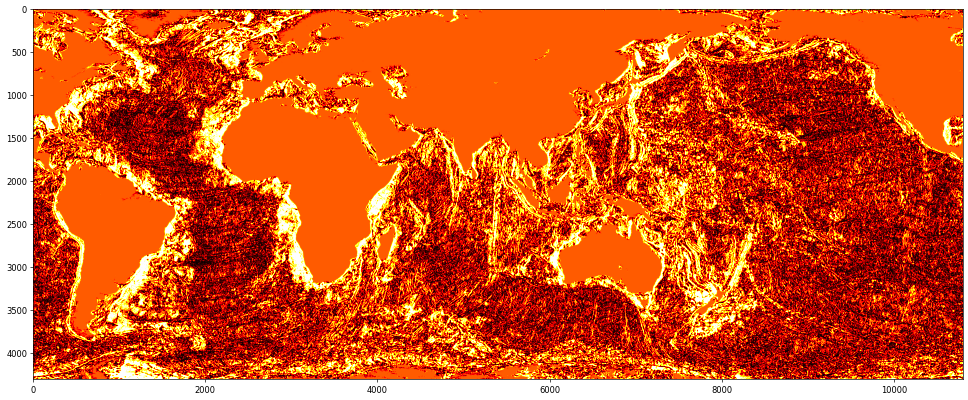

In [478]:
plt.figure(figsize=(20,10),dpi=60)
c=(dem.organization>0.75)*2
c[dem.elevation>=0]=1
plt.imshow(c,cmap='hot')

In [42]:
size=fclr.shape[0]*fclr.shape[1]

In [34]:
i,j=np.indices(relev.shape)

In [21]:

def display(things):
    print(things.shape[0])
    for k in range(20):
        ni,nj=np.random.default_rng().choice(things,axis=0)
        selec=elev[50*ni:50*ni+50,50*nj:50*nj+50]
        plt.figure(figsize=(15,15),dpi=60)
        plt.title(f'{np.min(selec)} to {np.max(selec)}')
        plt.imshow(selec,cmap='jet')

In [364]:
de=pd.DataFrame(columns=cols[:-2],data=[np.int32(fclr[rs<=8].mean(axis=0)*100)]+[np.int32(fclr[rs<=8].sum(axis=0))])
de

MOR   VRS    RS    AP   CR   CS   CSH  SCA
0    13    10    41     9    5    6    11    2
1  1602  1290  5064  1106  636  811  1345  257

In [452]:

rslt=fcluster(clu,2.5,criterion='distance')
rslt=rslt-1
nc=int(np.max(rslt))
vals3=vals.copy()
for k in range(1000):
    vals3[vals==k]=rslt[k]

vals3=np.float32(vals3)    
vals3[rs>8]=np.nan
merges=[0,1,2,2,3,4,5,6,4,6, 7, 8, 8]
val_c=vals3.copy()
for k in range(nc+1):
    val_c[vals3==k]=merges[k]
vals3=val_c
nc=int(np.nanmax(vals3))
aa=[]
cols=['MOR','VRS','RS','AP','CR','CS','CSH','SCA','size','%']
for k in range(nc+1):
    aa.append(list(np.int32(fclr[(vals3==k)].mean(axis=0)*100))+[int(0.5+((vals3==k).sum()))]+[int(0.5+((vals3==k).sum()/(rs<=8).sum())*100)])
df=pd.DataFrame(columns=cols,data=aa)
df

MOR  VRS  RS  AP  CR  CS  CSH  SCA  size   %
0   87    2   4   1   0   1    0    1  1470  12
1   41   14  28   4   1   4    1    1   483   4
2    2   38  55   1   0   1    0    0  1865  15
3    0   10  84   2   0   0    0    0  3634  30
4    2    7  43   6   4  16    3   15   844   7
5    0    0   0   0   0   3   96    0  1055   9
6    1    1   5   9   4  46   26    5  1064   9
7    1    1   8  17  63   5    1    0   536   4
8    0    1  24  58  12   2    0    0  1164  10

0: ridge core<br>
1: ridge border<br>
2: very rough seafloor (not the same as the base very rough seafloor, a mix since they can't be separated)<br>
3: normal rough seafloor<br>
4: scarped slopes<br>
5: shelf<br>
6: normal slopes<br>
7: continental rise<br>
8: abyssal plain<br>
(7 contains a bit of base abyssal plain and 8 a bit of base continental rise, explained by partial merge)<br>

Les théories d'adjacence sont confirmées, MOR, bordure de MOR avec un peu plus de VRS. zone RS/VRS mixte, zone RS. zone à pentes violentes suivies directement par du RS, mais sans CR. Zone avec un peu plus de CR, mais toujours pas beaucoup.

In [114]:

fc=classes.copy()
fc[fc==6]=5
fc[fc>8]=7
fc[fc>6]=fc[fc>6]-1
fclr=block_reduce(np.int32(fc),(50,50),clust.transfo_density)
rs=block_reduce(np.int32(classes),(50,50),clust.transfo_majority)

(2, 3)


In [18]:
t1=np.array(np.where(vals3==0)).T
t2=np.array(np.where(vals3==1)).T
t3=np.array(np.where(vals3==2)).T
t4=np.array(np.where(vals3==3)).T
t5=np.array(np.where(vals3==4)).T
t6=np.array(np.where(vals3==5)).T
t7=np.array(np.where(vals3==6)).T
t8=np.array(np.where(vals3==7)).T

In [19]:
elev=np.load('data/st.npy')[250:-250,:]

In [58]:
fclr.shape

(76, 216, 8)

In [44]:
def save(indices,cl):
    for ni,nj in indices:
        selec=elev[50*ni:50*ni+50,50*nj:50*nj+50]
        plt.imsave(f'imgs/{cl}/{ni}+{nj}+{np.min(selec)}+{np.max(selec)}.png',selec,cmap='jet')

In [45]:
save(t1,0)

In [46]:
save(t2,1)
save(t3,2)
save(t4,3)
save(t5,4)
save(t6,6)
save(t7,7)

In [929]:
(180/np.pi)*np.arctan(1/500)

0.11459140623778596

In [18]:
ka=dem.roughness<=0.25

In [6]:
ka2=dem.organization<=0.7

In [4]:
ka.mean()

0.3853057278208441

In [648]:
np.nanmin(vals4)

0.0

In [72]:
df

MOR  VRS  RS  AP  CR  CS  CSH  SCA
0    0    0   0   1   0   8   86    1
1    3    6  39   5   3  20    3   17
2    1    1   7  13   5  49   15    5
3    1    1   7  19  62   5    1    0
4    0    3  45  36  10   2    0    1
5    0    0   5  75  15   1    0    0
6   76    5  10   2   1   1    0    1
7    3   51  43   0   0   0    0    0
8    1   14  77   2   1   1    0    0

0: ridge core<br>
1: ridge border<br>
2: very rough seafloor (not the same as the base very rough seafloor, a mix since they can't be separated)<br>
3: normal rough seafloor<br>
4: scarped slopes<br>
5: shelf<br>
6: normal slopes<br>
7: continental rise<br>
8: abyssal plain<br>
(7 contains a bit of base abyssal plain and 8 a bit of base continental rise) maybe find a separation?<br>

Catégories:
- mid ridge
- mid ridge / sea floor border
- seafloor (smooth, rough, very, rough)
- seafloor/continental rise
- continental rise
- rise/slope border
- seafloor/slope border (only seafloor/scarped?)
- continental slope
- scarped continental slope
- continental shelf

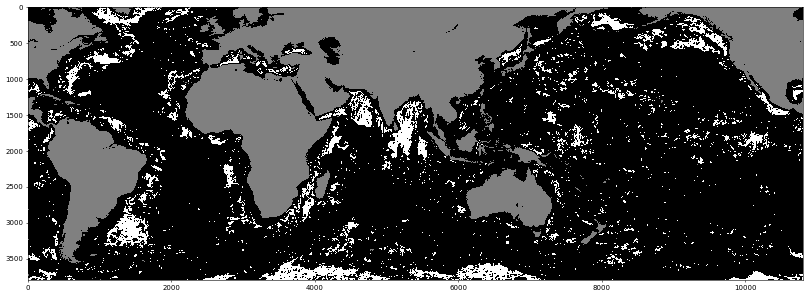

In [457]:
a=2*(classes==ABYSSAL_PLAIN)
a[classes>8]=1
plt.figure(figsize=(20,10),dpi=50)
plt.imshow(a,cmap='gray',interpolation='nearest')

In [383]:
vals4=np.float32(vals3.copy())
vals4[vals3==0]=MID_OCEANIC_RIDGE
vals4[vals3==1]=MID_OCEANIC_RIDGE+0.3
vals4[vals3==2]=VERY_ROUGH_SEAFLOOR
vals4[vals3==3]=ROUGH_SEAFLOOR
vals4[vals3==4]=SCARPS
vals4[vals3==5]=CONTINENTAL_SHELF
vals4[vals3==6]=UPPER_CONTINENTAL_SLOPE
vals4[vals3==7]=CONTINENTAL_RISE
vals4[vals3==8]=ABYSSAL_PLAIN

In [398]:
((np.max(fclr,axis=-1)>=0.95)&(rs<=8)).sum()/(rs<=8).sum()

0.1976062732150227

In [412]:
rss

array([[ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       ...,
       [ True, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

In [451]:
((np.max(fclr,axis=-1)>=0.95)&(rs==CONTINENTAL_SHELF)).sum()
((np.max(fclr,axis=-1)>=0.95)&(rs==MID_OCEANIC_RIDGE)).sum()

738

In [446]:
['MOR',
 'VRS',
 'RS',
 'AP',
 'CR',
 'CS',
 'CSH',
 'SCA']


['MOR', 'VRS', 'RS', 'AP', 'CR', 'CS', 'CSH', 'SCA']

In [449]:
((fclr[:,:,5]>=0.3)&(fclr[:,:,6]>=0.1)).sum()

494

In [131]:
import tensorflow


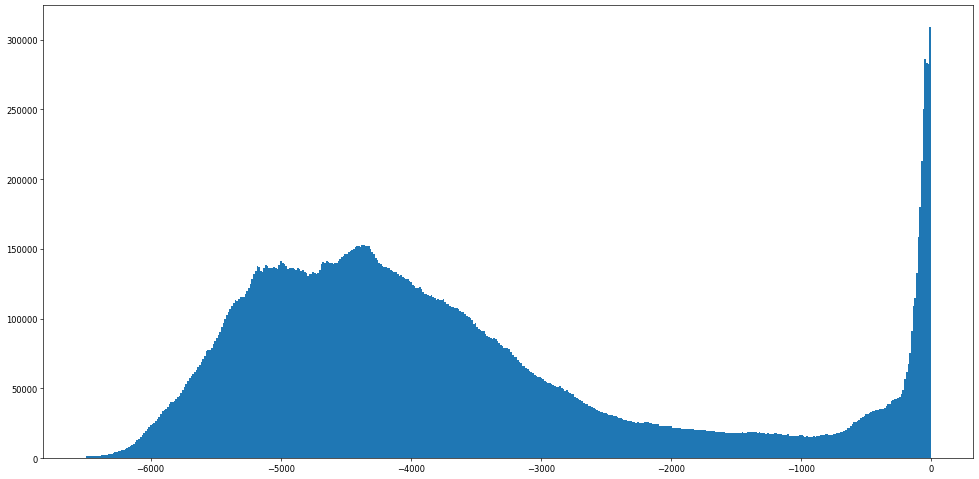

In [37]:
plt.figure(figsize=(20,10),dpi=60)
_=plt.hist(elevation[(elevation<=0)&(elevation>-6500)].flatten(),bins=500)

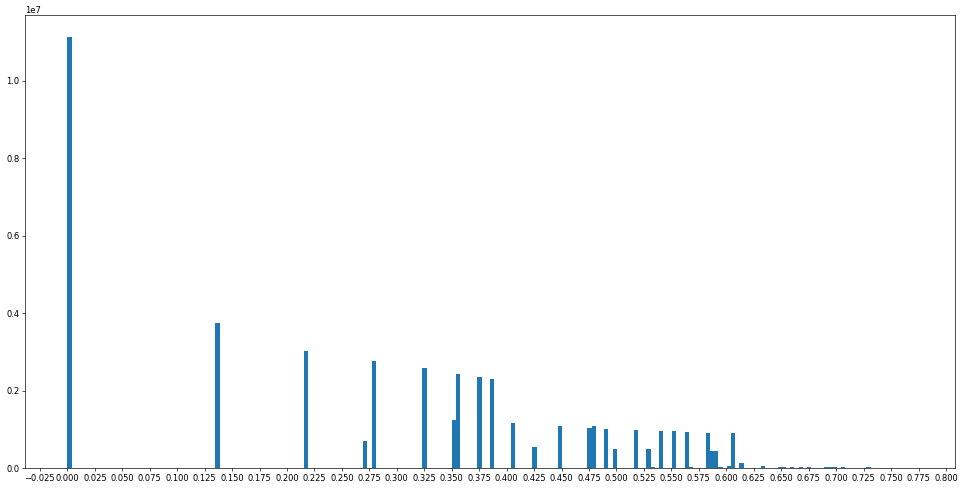

In [560]:
plt.figure(figsize=(20,10),dpi=60)
ax=plt.axes()
ax.xaxis.set_major_locator(matplotlib.ticker.MultipleLocator(0.025))
_=plt.hist(dem.roughness.flatten(),bins=200)

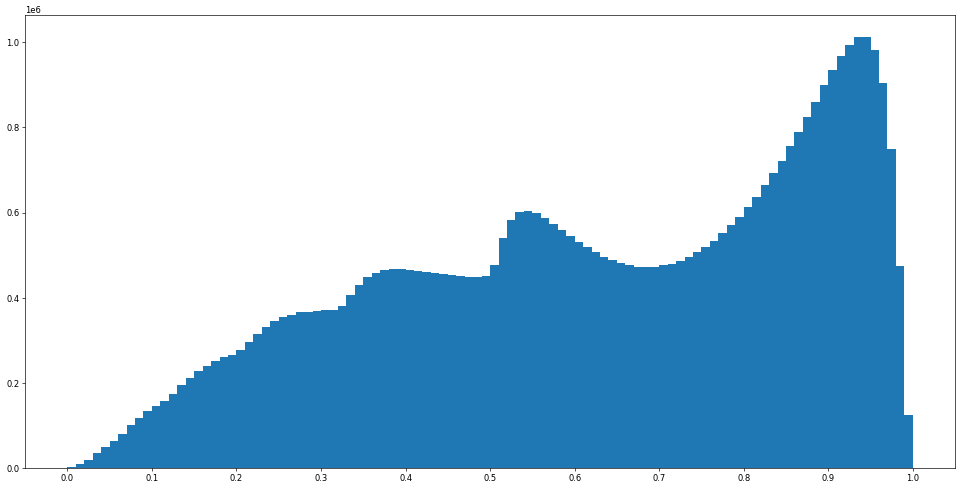

In [152]:
plt.figure(figsize=(20,10),dpi=60)
ax=plt.axes()
ax.xaxis.set_major_locator(matplotlib.ticker.MultipleLocator(0.1))
_=plt.hist((organization).flatten(),bins=100)

In [38]:
def display(data,st):
    plt.figure(figsize=(25,10),dpi=60)
    cos=np.float32(data.copy())
    cos[st>=0]=np.nan
    rt=copy.copy(matplotlib.cm.gray)
    rt.set_bad('red')
    plt.imshow(cos,cmap=rt,interpolation='nearest')

In [696]:
np.arctan(1/32)*RadToDeg

1.7899106082460694